In [27]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
trueLables = pd.read_csv('bbcsport_classes.csv',delimiter=",", header=None).values
print(trueLables.shape)
terms = pd.read_csv('bbcsport_terms.csv',delimiter=",", header=None).values
print(terms.shape)
X = pd.read_csv('bbcsport_mtx.csv',delimiter=",", header=None).values
print(X.shape)
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels    = kmeans.labels_

print(centroids.shape)
print(labels.shape)


(737, 1)
(4613, 1)
(737, 4613)
(5, 4613)
(737,)


In [28]:
totalrandom=0
totalmutual=0
for k in range(50):
    kmeans = KMeans(n_clusters=5, n_init=10)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    labels    = kmeans.labels_
    trueLables = np.ravel(trueLables)
    
    totalrandom = totalrandom + metrics.adjusted_rand_score(labels, trueLables)
    totalmutual = totalmutual + metrics.adjusted_mutual_info_score(labels, trueLables)

print("rand index over 50 averages iterations ",totalrandom/50)
print("mutual information",totalmutual/50)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='a

rand index over 50 averages iterations  0.0772263401487872
mutual information 0.15024560891217184


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


(737, 1)
(4613, 1)
(737, 4613)


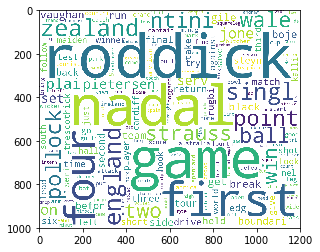

In [29]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import pandas as pd
trueLables = pd.read_csv('bbcsport_classes.csv',delimiter=",", header=None).values
print(trueLables.shape)
terms = pd.read_csv('bbcsport_terms.csv',delimiter=",", header=None).values
print(terms.shape)
X = pd.read_csv('bbcsport_mtx.csv',delimiter=",", header=None).values
print(X.shape)
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels    = kmeans.labels_
centroids = sum(map(np.array, centroids))
Y = pd.read_csv('bbcsport_terms.csv',delimiter=",", header=None).values
Y = Y.reshape(len(Y),)
Z = dict(zip(Y.T,centroids))
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white', width=1200, height=1000).generate_from_frequencies(Z)
fig = plt.figure()
plt.imshow(wordcloud)
plt.show()

(737, 4613)
[[24.94224822  8.52879537  1.5142791  ... -0.08264745 -0.07169783
  -0.07387169]
 [-0.06787006 -0.09359446  0.0282289  ... -0.08264745 -0.07169783
  -0.07387169]
 [-0.06787006 -0.09359446 -0.71479619 ... -0.08264745 -0.07169783
  -0.07387169]
 ...
 [-0.06787006 -0.09359446  0.771254   ... -0.08264745 -0.07169783
  -0.07387169]
 [-0.06787006 -0.09359446 -0.71479619 ... -0.08264745 -0.07169783
  -0.07387169]
 [-0.06787006 -0.09359446  2.2573042  ... -0.08264745 -0.07169783
  -0.07387169]]
[[ 1.          0.28624881  0.07035547 ... -0.00560929 -0.00486614
  -0.00501368]
 [ 0.28624881  1.          0.1156495  ... -0.00773534 -0.00671052
  -0.00691398]
 [ 0.07035547  0.1156495   1.         ...  0.05146035  0.01724489
   0.08441809]
 ...
 [-0.00560929 -0.00773534  0.05146035 ...  1.          0.86751414
  -0.00610531]
 [-0.00486614 -0.00671052  0.01724489 ...  0.86751414  1.
  -0.00529644]
 [-0.00501368 -0.00691398  0.08441809 ... -0.00610531 -0.00529644
   1.        ]]
Eigen values

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Data after PCA')

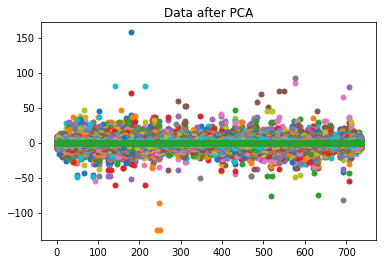

In [30]:
X = pd.read_csv('bbcsport_mtx.csv',delimiter=",", header=None).values
print(X.shape)
mu = X.mean(axis=0) 
sigma = X.std(axis=0)
Xnorm = (X - mu)/sigma
print (Xnorm[:,:])
m = len(Xnorm)
covmat = np.dot(Xnorm.T, Xnorm)/m 
print(covmat)
S,U = np.linalg.eig(covmat)
print('Eigen values: {}'.format(S))
print('Eigen vectors:')
print(U)
Z = np.dot(Xnorm,U)
plt.plot(Z, '.', markersize=10)
plt.title('Data after PCA')

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Reconstructed Normalized Data')

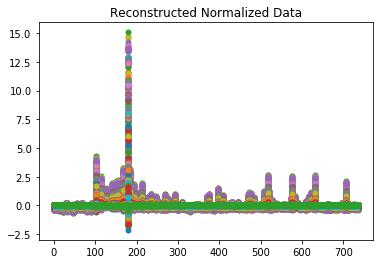

In [31]:
k = 1 
Ured =  U[:,0:k] 
Zred = np.dot(Xnorm,Ured) 
Xrec = np.dot(Zred, Ured.T)
plt.plot(Xrec, '.', markersize=10)
plt.title('Reconstructed Normalized Data')
